# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!

# Obtain BTC data from url
btc_data_response = requests.get(btc_url)
#btc_data_response debug check for response

#convert response to JSON format
btc_data = btc_data_response.json()
#btc_data debug check of dictionary structure

#Obtaining price in USD. CAD is also available, but price is fetched in USD
btc_price = btc_data['data']['1']['quotes']['USD']['price']
#btc_price debug check

# Fetch current ETH price
# YOUR CODE HERE!]

# Obtain ETH data from url
eth_data_response = requests.get(eth_url)
#eth_data_response debug check for response

#convert response to JSON format
eth_data = eth_data_response.json()
#eth_data #ebug check of dictionary structure

eth_price = eth_data['data']['1027']['quotes']['USD']['price']
#eth_price


# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc*btc_price
my_eth_value = my_eth*eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $72207.60
The current value of your 5.3 ETH is $10126.29


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url="https://paper-api.alpaca.markets",
    api_version="v2"
)

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!

#Obtaining todays date from system and formatting
from datetime import date
today = date.today()
#the below will generate date in the form YYYY-MM-DD
today_date = str(today.year) + "-" + str(today.month) + "-" + str(today.day)

#the variable today_date obtained above CANNOT be used here as ALPACA does not have market data intra day or 
#before market open
#on weekends
#Therefore using hardcoded date
start_date = pd.Timestamp("2021-03-10", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-03-10", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df

# Preview DataFrame
# YOUR CODE HERE!
df_ticker


AGG                                      SPY  \
                            open   high      low   close   volume    open   
time                                                                        
2021-03-10 00:00:00-05:00  114.3  114.5  114.275  114.45  6270242  389.69   

                                                                 
                            high       low     close     volume  
time                                                             
2021-03-10 00:00:00-05:00  391.4  388.1702  389.5199  101349197

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
closing_prices = pd.DataFrame()
closing_prices['AGG'] = df_ticker['AGG']['close']
closing_prices['SPY'] = df_ticker['SPY']['close']

agg_close_price = closing_prices['AGG'][0]
spy_close_price = closing_prices['SPY'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.45
Current SPY closing price: $389.5199


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy*spy_close_price
my_agg_value = my_agg*agg_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19475.99
The current value of your 200 AGG shares is $22890.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Create savings DataFrame
# YOUR CODE HERE!
temp = {"":["crypto", "shares"], "amount":[my_btc_value+my_eth_value,my_spy_value+my_agg_value]}
df_savings = pd.DataFrame(data = temp)

#setting crypto and shares as index
df_savings.set_index('', inplace = True)

#Display savings DataFrame
df_savings

,amount
,
crypto,82333.886
shares,42365.995


<AxesSubplot:title={'center':'Current Asset Allocation'}, ylabel='amount'>

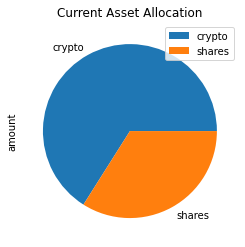

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind = 'pie', y = 'amount', title = 'Current Asset Allocation')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = round(df_savings.iloc[0,0] + df_savings.iloc[1,0],2)

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations, you have sufficient money in your fund. Your savings are ", total_savings, ", and is higher than your financial goal of", emergency_fund)
elif total_savings == emergency_fund:
    print("Congratulations, you have reached your financial goal. Your savings are ", total_savings, ", and is equal to your financial goal of", emergency_fund)
else:
    print("You need to have the following additional amount to reach your financial goal: ", emergency_fund -  total_savings)

Congratulations, you have sufficient money in your fund. Your savings are  124699.88 , and is higher than your financial goal of 36000


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2019-03-10', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-10', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

#Ensure to run ALL BAOVE CELLS before running this one.

#Alpaca API has limit of 1000, therefore extract data into multiple tables and append to get five year datset
df_stock_data1 = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df

start_date = pd.Timestamp('2017-03-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2019-03-09', tz='America/New_York').isoformat()

df_stock_data2 = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df

start_date = pd.Timestamp('2016-03-10', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2017-03-08', tz='America/New_York').isoformat()

df_stock_data3 = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df

#Appending tables to obrain five year dataset
temp_table1 = pd.concat([df_stock_data3, df_stock_data2], axis = 0)
df_stock_data = pd.concat([temp_table1, df_stock_data1], axis = 0)

# Display sample data
#Ensure to run ALL ABOVE CELLS before running this one
df_stock_data

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-03-10 00:00:00-05:00  109.65  109.7372  109.3800  109.610  2630542   
2016-03-11 00:00:00-05:00  109.65  109.7100  109.3900  109.410  1872055   
2016-03-14 00:00:00-04:00  109.49  109.6000  109.4501  109.480  2036924   
2016-03-15 00:00:00-04:00  109.68  109.7000  109.3900  109.410  1644488   
2016-03-16 00:00:00-04:00  109.39  109.8600  109.2863  109.850  1695716   
...                           ...       ...       ...      ...      ...   
2021-03-04 00:00:00-05:00  114.79  114.8000  114.2600  114.360  5239421   
2021-03-05 00:00:00-05:00  114.17  114.3197  114.0500  114.285  6190988   
2021-03-08 00:00:00-05:00  114.20  114.2300  113.8300  113.840  5213848   
2021-03-09 00:00:00-05:00  114.20  114.3100  114.0000  114.250  5074245   
2021-03-10 00:00:00-05:00  114.30  114.5000  114.2750  114.450  6270242   

                              SPY                                         
                             open    high       low     close     volume  
time                                                                      
2016-03-10 00:00:00-05:00  199.96  201.07  197.3800  199.5400  124688126  
2016-03-11 00:00:00-05:00  201.26  202.81  201.1200  202.7300   90751611  
2016-03-14 00:00:00-04:00  202.16  203.04  201.7700  202.4950   60548506  
2016-03-15 00:00:00-04:00  201.36  202.20  201.0500  202.1800   63249335  
2016-03-16 00:00:00-04:00  201.60  203.82  201.5500  203.4000   98947700  
...                           ...     ...       ...       ...        ...  
2021-03-04 00:00:00-05:00  381.22  384.00  371.8800  376.7300  168203161  
2021-03-05 00:00:00-05:00  380.46  384.76  372.6400  383.5950  133661539  
2021-03-08 00:00:00-05:00  384.66  387.68  381.4200  381.7400  107185328  
2021-03-09 00:00:00-05:00  385.85  389.91  381.7299  387.1100   97898909  
2021-03-10 00:00:00-05:00  389.69  391.40  388.1702  389.5199  101349197  

[1259 rows x 10 columns]

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-03-10 00:00:00-05:00  109.65  109.7372  109.3800  109.61  2630542   
2016-03-11 00:00:00-05:00  109.65  109.7100  109.3900  109.41  1872055   
2016-03-14 00:00:00-04:00  109.49  109.6000  109.4501  109.48  2036924   
2016-03-15 00:00:00-04:00  109.68  109.7000  109.3900  109.41  1644488   
2016-03-16 00:00:00-04:00  109.39  109.8600  109.2863  109.85  1695716   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2016-03-10 00:00:00-05:00          NaN  199.96  201.07  197.38  199.540   
2016-03-11 00:00:00-05:00    -0.001825  201.26  202.81  201.12  202.730   
2016-03-14 00:00:00-04:00     0.000640  202.16  203.04  201.77  202.495   
2016-03-15 00:00:00-04:00    -0.000639  201.36  202.20  201.05  202.180   
2016-03-16 00:00:00-04:00     0.004022  201.60  203.82  201.55  203.400   

                                                   
                              volume daily_return  
time                                               
2016-03-10 00:00:00-05:00  124688126          NaN  
2016-03-11 00:00:00-05:00   90751611     0.015987  
2016-03-14 00:00:00-04:00   60548506    -0.001159  
2016-03-15 00:00:00-04:00   63249335    -0.001556  
2016-03-16 00:00:00-04:00   98947700     0.006034

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002890,0.999551,1.002041,0.996035,0.997820,1.002194,0.991327,0.989672,1.002317,1.005227,...,0.998865,0.997848,1.004162,0.999318,1.010620,0.992318,0.992307,0.993201,1.008655,1.008829
2,1.011406,1.007475,0.991432,0.994344,0.999836,1.002236,0.988221,0.980980,1.003336,0.993886,...,1.003719,0.993147,1.005995,0.995014,1.010571,0.989572,1.008355,0.998737,1.003766,1.004487
3,1.017100,1.006170,0.979200,0.992334,0.992637,0.991152,0.978515,0.982235,1.003449,0.991618,...,1.012192,0.987846,0.997920,1.002013,1.011882,0.979726,1.001984,0.998495,1.007620,1.010783
4,1.022142,0.997960,0.988364,0.997117,1.006384,0.991919,0.981225,0.977165,0.996585,0.989190,...,1.015272,0.991020,1.008859,0.991417,1.008275,0.978878,1.002192,0.993343,1.003929,1.016974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,45.722704,6.480837,33.174831,33.610121,21.591727,8.955700,12.444191,29.653336,8.249051,16.795856,...,11.165196,30.851861,7.749568,18.532969,21.922960,8.275934,6.771807,17.060650,8.805143,18.934362
7557,45.688209,6.437365,33.013093,33.946120,21.679080,8.979208,12.496911,29.836835,8.220674,16.840354,...,11.315916,30.810361,7.830851,18.213500,22.009827,8.306278,6.824931,16.732410,8.967085,18.821358
7558,45.241895,6.530458,32.711057,34.225318,21.870342,9.066248,12.640084,29.966996,8.176829,16.923742,...,11.316764,31.079471,7.827960,18.116029,22.000296,8.313326,6.821138,16.965096,9.012983,18.616671
7559,45.820759,6.548479,32.985059,34.108748,21.887769,9.076269,12.797702,29.990272,8.148053,16.813192,...,11.439542,30.706292,7.896443,18.124313,21.917747,8.355108,6.839935,16.930900,9.079513,18.634887


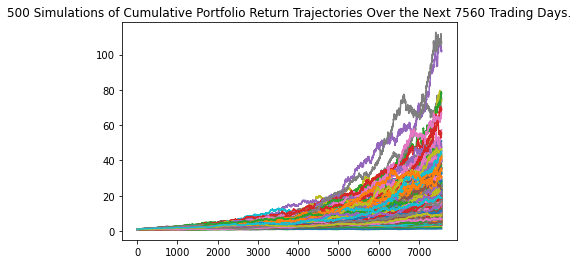

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirtyyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

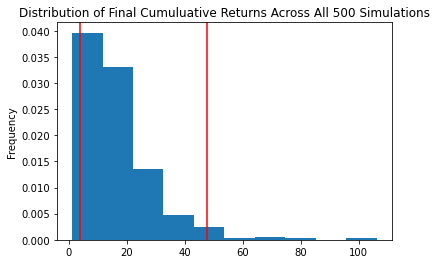

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirtyyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirtyyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             16.763596
std              12.870510
min               1.152232
25%               8.492193
50%              13.004995
75%              21.755060
max             106.178374
95% CI Lower      3.768625
95% CI Upper     47.559163
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $75372.51 and $951183.25


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
del ci_lower
del ci_upper
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $113058.76 and $1426774.88


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
#changed stock composition to 90% and bonds to 10%
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.10,.90],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003803,1.013251,1.012406,1.000221,1.000524,1.009240,1.009139,0.997923,1.010565,0.990564,...,1.008241,1.010174,1.004945,0.991674,1.003147,0.995927,0.983236,0.983978,1.014650,0.997906
2,1.012897,1.026393,1.020271,0.980368,0.989067,0.988359,1.018598,1.015593,1.007659,0.982857,...,1.008504,1.002326,1.008067,1.026511,1.014456,1.009026,0.987770,0.986069,0.999481,0.991156
3,1.029651,1.017167,1.015039,0.986021,0.997609,0.987985,1.024241,1.029042,1.019788,0.978524,...,0.983151,1.002920,0.988610,1.038317,1.021707,1.015836,0.993120,0.994992,0.991571,1.012065
4,1.028211,1.013461,1.005790,0.999242,0.986294,1.012072,1.032104,1.030973,1.018653,0.989054,...,0.975843,1.018379,0.987025,1.035596,1.046105,1.026202,0.991229,1.001124,1.003397,0.985610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.533980,1.310146,1.582502,1.514762,3.248388,1.780602,2.437105,0.864408,2.113600,1.544316,...,1.709304,2.934901,1.828023,2.045202,2.060164,1.736286,1.587140,2.238802,2.569213,1.017944
1257,1.506502,1.317857,1.571276,1.501955,3.248052,1.793408,2.463361,0.864799,2.143345,1.556092,...,1.712922,2.957316,1.817524,2.043182,2.069770,1.736850,1.556205,2.219276,2.573866,1.019345
1258,1.500309,1.340356,1.565613,1.514556,3.238889,1.796196,2.465243,0.871995,2.162025,1.531282,...,1.690257,2.959573,1.791110,2.032107,2.084257,1.767989,1.548597,2.200257,2.569887,1.007606
1259,1.503404,1.311983,1.535832,1.561342,3.303551,1.785865,2.485375,0.887927,2.182390,1.536840,...,1.692653,2.957895,1.777047,1.993650,2.095114,1.776863,1.556390,2.162329,2.622355,1.003921


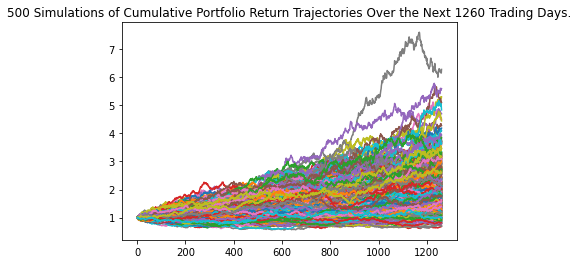

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot2 = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot2.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

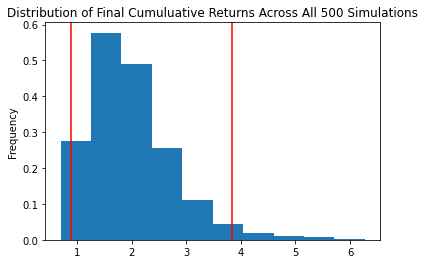

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot2 = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot2.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tb2 = MC_fiveyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tb2)

count           500.000000
mean              1.990190
std               0.789699
min               0.693535
25%               1.463859
50%               1.859956
75%               2.363827
max               6.272195
95% CI Lower      0.881154
95% CI Upper      3.838631
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_five = round(tb2[8]*initial_investment,2)
ci_upper_five = round(tb2[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $52869.22 and $230317.87


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
#stock composition is 90%
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.10,.90],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010592,1.013458,0.995636,0.997613,0.989196,1.011776,0.983756,1.004974,0.995664,0.998530,...,0.990416,1.021864,1.007468,1.015823,0.992595,1.006428,0.991294,1.011598,0.984615,0.999065
2,1.013343,1.014621,0.990346,1.008018,1.007913,1.002742,0.996653,0.991667,1.006414,0.993645,...,0.997679,1.041805,1.016404,1.007342,1.021534,0.984400,1.012995,1.013111,0.993706,0.998179
3,1.016926,1.008581,0.999561,1.024343,1.011168,0.988924,0.993566,1.005597,1.027966,0.989665,...,0.991342,1.037113,1.018501,1.015660,1.021145,0.980666,1.010911,1.023350,0.976352,0.986446
4,1.030698,1.002030,0.995059,1.008749,1.001721,0.992719,0.994245,1.007655,1.018522,1.003276,...,0.989831,1.037002,1.017849,1.020269,1.008628,0.971965,1.022310,1.035343,0.963785,0.979143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.922188,6.830382,3.883857,2.082341,6.215269,2.357722,3.075802,2.892401,2.347614,16.060548,...,1.843688,3.893305,2.432513,7.806897,3.621125,7.471463,2.815977,7.070499,8.356877,5.574083
2517,5.965277,6.936911,3.889272,2.085362,6.160857,2.383847,3.062017,2.943779,2.337047,15.973944,...,1.837411,3.936185,2.423834,7.819024,3.659132,7.389018,2.855505,6.985854,8.283458,5.507203
2518,6.034884,6.889104,3.929174,2.086627,6.013330,2.370066,3.045775,2.894493,2.343478,15.994759,...,1.835331,3.944026,2.446078,7.875361,3.678402,7.482834,2.880380,7.014588,8.434352,5.551337
2519,6.043236,6.824441,3.885863,2.067377,6.120565,2.406218,3.036678,2.901694,2.330354,15.976058,...,1.835082,3.967362,2.417186,7.936091,3.685968,7.468642,2.887565,6.985105,8.391024,5.528704


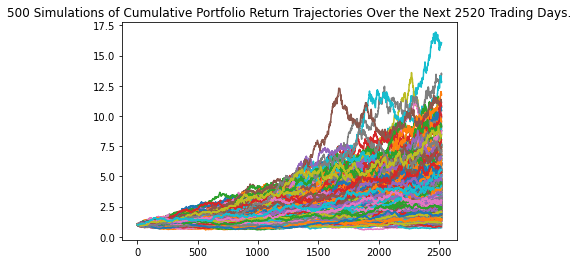

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot3 = MC_tenyear.plot_simulation()

# Save the plot for future usage
line_plot3.get_figure().savefig("MC_tenyear_sim_plot.png", bbox_inches="tight")

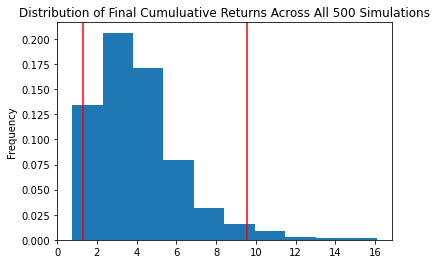

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot3 = MC_tenyear.plot_distribution()

# Save the plot for future usage
dist_plot3.get_figure().savefig('MC_tenyear_dist_plot.png',bbox_inches='tight')

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tb3 = MC_tenyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tb3)

count           500.000000
mean              4.015930
std               2.168638
min               0.756688
25%               2.480833
50%               3.627246
75%               5.040102
max              16.071503
95% CI Lower      1.288119
95% CI Upper      9.532048
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tb2[8]*initial_investment,2)
ci_upper_ten = round(tb2[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $52869.22 and $230317.87
